<a href="https://colab.research.google.com/github/jfergus20/golfswingtracker/blob/main/GolfTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Oct 15 15:36:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 24.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks

Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/112.6 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 12.67 GB
Disk                29.2/112.6 GB
CPU                 Intel Xeon 2.20GHz
CPU count           2
GPU                 Tesla T4, 15102MiB
GPU count           1
CUDA                12.1

numpy               ✅ 1.26.4>=1.23.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.10.0.84>=4.6.0
pillow              ✅ 10.4.0>=7.1.2
pyyaml              ✅ 6.0.2>=5.3.1
requests            ✅ 2.32.3>=2.23.0
scipy               ✅ 1.13.1>=1.4.1
torch               ✅ 2.4.1+cu121>=1.8.0
torchvision         ✅ 0.19.1+cu121>=0.9.0
tqdm                ✅ 4.66.5>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.2.2>=1.1.4
seaborn             ✅ 0.13.2>=0.11.0
ultralytic

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="key")
project = rf.workspace("public-bezoe").project("golf-head-object-detection-ver2")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Golf-Head-Object-Detection-Ver2-1 in yolov11:: 100%|██████████| 2234/2234 [00:00<00:00, 4298.82it/s]


In [ ]:
%cd {HOME}

model = YOLO("yolo11n.pt")

train_results = model.train(
    data = "/content/Golf-Head-Object-Detection-Ver2-1/data.yaml",
    epochs = 25,
    imgsz = 640,
    device = 0,
)
metrics = model.val()

/content


100%|██████████| 5.35M/5.35M [00:00<00:00, 80.9MB/s]


Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Golf-Head-Object-Detection-Ver2-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 19.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

KeyboardInterrupt: 

'\nok, \n\n\n\n\n\n\n\n\n'

In [ ]:
#what do I want the input of this cell to be
# needs model,video
import cv2
import numpy as np

# model = YOLO("/content/runs/detect/train/weights/best.pt")
model = YOLO("/content/best.pt")
video_path = "/content/jamie2copy.mov"
video = cv2.VideoCapture(video_path)

X = []#px
Y = []#px
Z = []#mm

init_width = 0 #px
focal = 26 #mm, standard iphone focal length
not_yet = True
frame_count = 0
while True:
    success, frame = video.read()
    if not success:
        print(f"Failed to read frame after {frame_count} frames")
        break

    frame_count += 1
    results = model(frame)

    if len(results[0].boxes) > 0:
      if not_yet:
        print("init_width")
        init_box = results[0].boxes.xyxy[0]
        init_width = init_box[0].item() - init_box[2].item()
        not_yet = False
        #init_width = results[0].boxes.xyxy[0] - results[0].boxes.xyxy[2]

      c_box = results[0].boxes.xyxy[0]
      current_width = c_box[0].item() - c_box[2].item()
      # current_width = results[0].boxes.xyxy[0] - results[0].boxes.xyxy[2]


      box = results[0].boxes.xywh[0]
      x,y = box[0].item(),box[1].item()

      # dist = (width*focal)/pixels
      # z = dist

      z = (init_width*focal)/current_width

      X.append(x)
      Y.append(y)
      Z.append(z)

video.release()
print("X coords: ", X)
print("Y coords: ", Y)
print("Z coords: ", Z)
print(len(X), len(X)==len(Y))
print(len(Z), len(X)==len(Z))


# dont do im.show - should be good

# start with xy, then do z





0: 640x384 1 Golf Head, 15.5ms
Speed: 2.3ms preprocess, 15.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 384)
init_width

0: 640x384 1 Golf Head, 11.9ms
Speed: 3.3ms preprocess, 11.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 14.5ms
Speed: 3.3ms preprocess, 14.5ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 14.6ms
Speed: 2.9ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 14.9ms
Speed: 2.9ms preprocess, 14.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 11.9ms
Speed: 3.2ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Golf Head, 17.8ms
Speed: 3.9ms preprocess, 17.8ms inference, 1.7ms postp

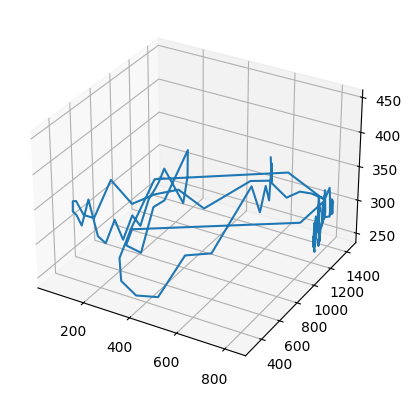

In [ ]:
#input: list of xyz coords

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
import math

ax = plt.figure().add_subplot(projection='3d')

Z = [z for z in Z]
# X = X[:-20]
# Y = Y[:-20]
# Z = Z[:-20]
ax.plot(X,Y,Z) #swap z and y
#ax.legend()

plt.show()

#output: 3d line plot

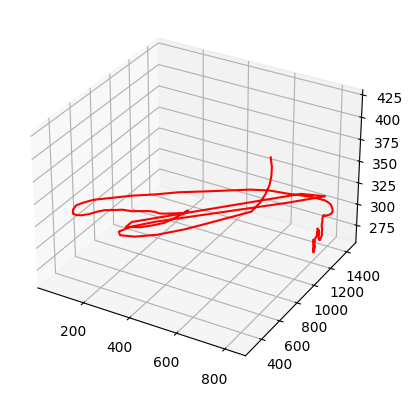

In [ ]:
#x = np.linspace(0,2*np.pi,100)
#y = np.sin(x) + np.random.random(100) * 0.2
from scipy.signal import savgol_filter
zhat = savgol_filter(Z, 51, 3) # window size 51, polynomial order 3
ax = plt.figure().add_subplot(projection='3d')


#ax.plot(X,Y,Z)
ax.plot(X,Y,zhat, color='red')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Create a sample DataFrame
data = {'x': X, 'y': Y, 'z': zhat}
df = pd.DataFrame(data)

In [ ]:
# Specify the path in your Google Drive where you want to save the CSV file
path = '/content/drive/My Drive/sendtolevi6.csv'

# Save the DataFrame to CSV
df.to_csv(path, index=False)  # Set index=False to avoid saving the index column